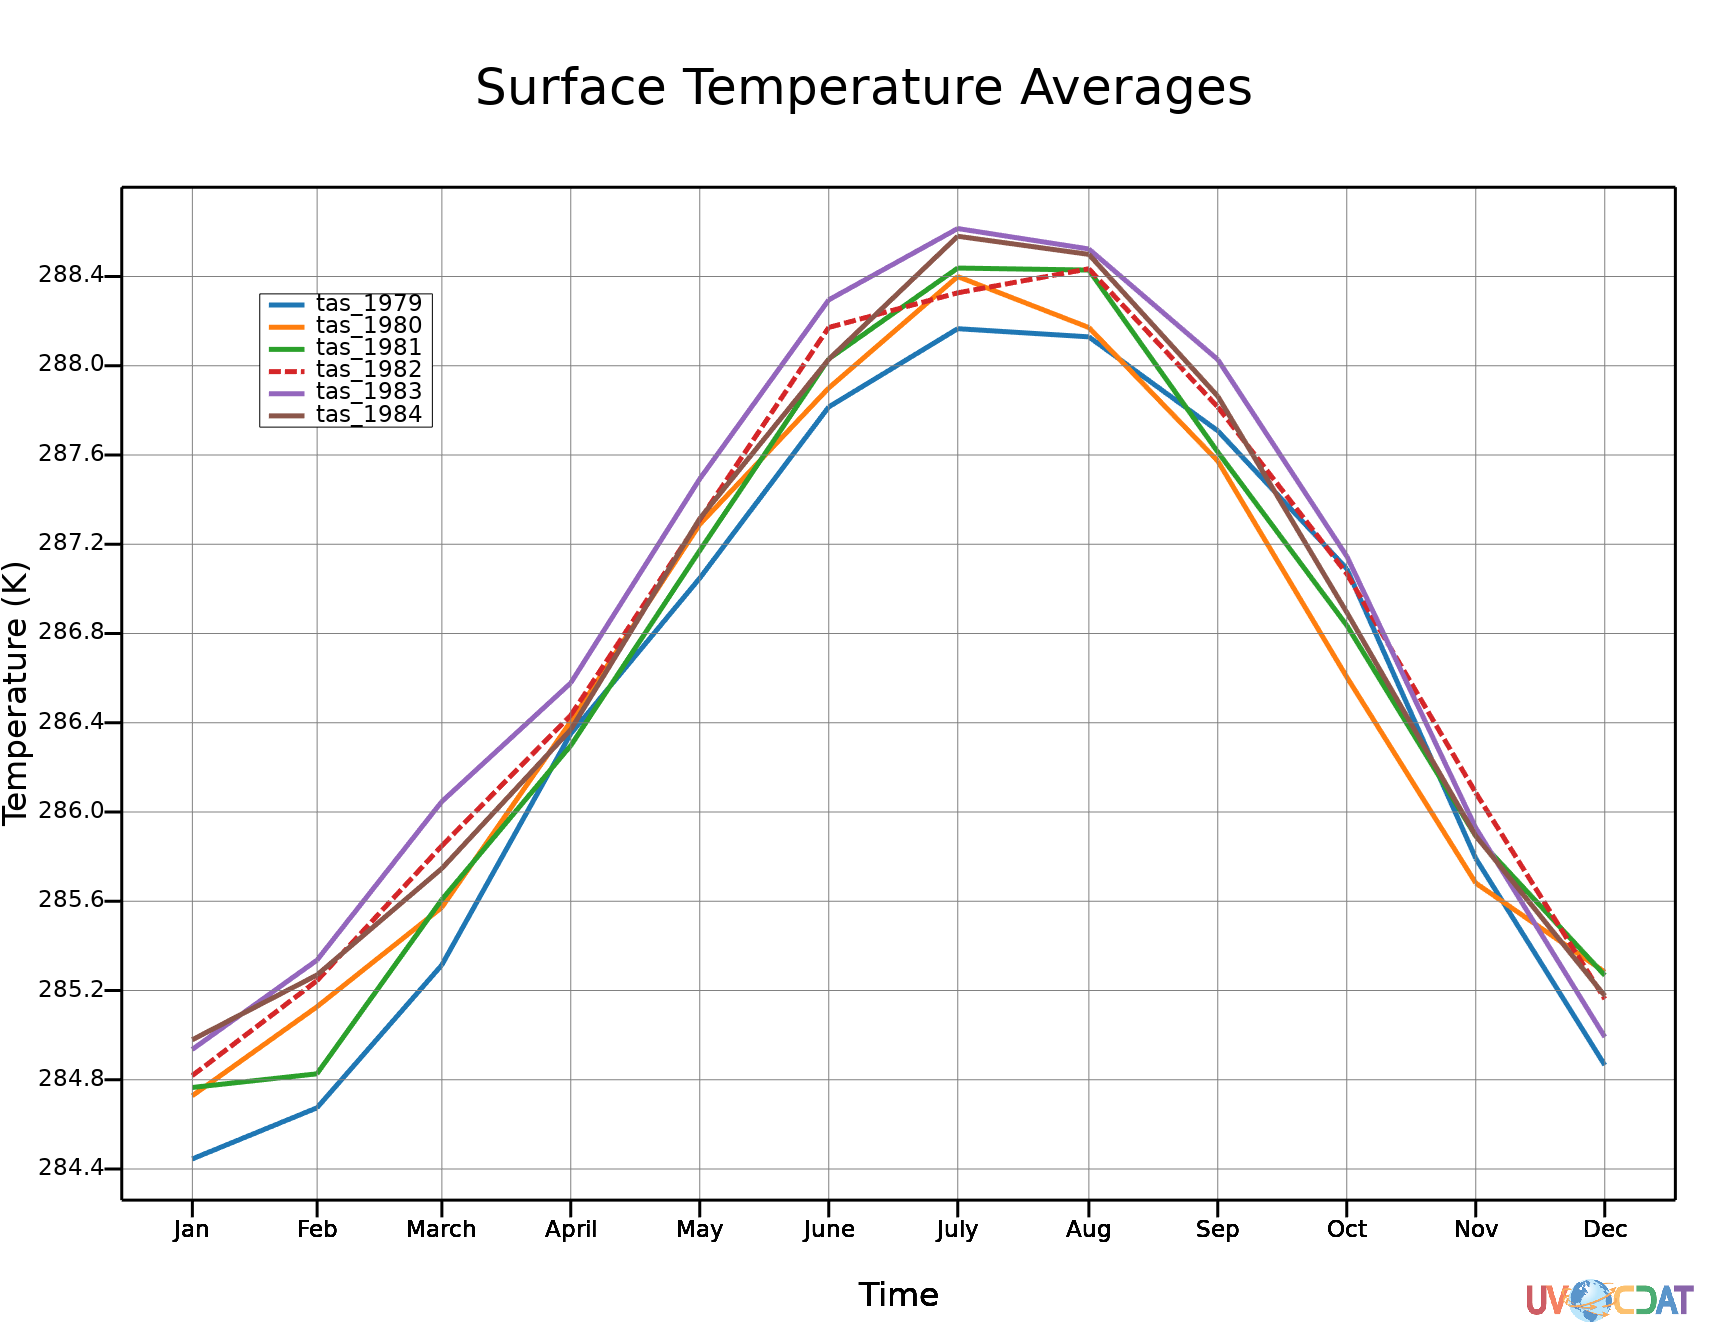

In [1]:
import os
import vcs
import cdms2
import vcsaddons.EzPlot
import cdutil

# Classic Spaghetti Plot with EzPlot
    
# A quick example on how to use the above function
f = cdms2.open(os.path.join(vcs.sample_data, "tas_ccsr-95a.xml"))

variables = []
for i in range(6):
    tas = f("tas", slice(i*12, (i+1)*12))  # Extract one year
    # Assign an ID that will distinguish the years
    tas.id = "tas_%i" % tas.getTime().asComponentTime()[0].year
    # Manipulating the variable changes the id; we'll save it here.
    saved_id = tas.id
    # Make sure the data is bounded before averaging
    cdutil.setTimeBoundsMonthly(tas)
    var = cdutil.averager(tas(squeeze=1), axis="xy")
    var = cdutil.ANNUALCYCLE.climatology(var)
    var.id = saved_id
    variables.append(var)

plotfunction = vcsaddons.EzPlot.EzLinePlot()

canvas = vcs.init()

# Customize the lines used to draw the plots
line_type  = ["solid", "solid", "solid", "long-dash", "solid", "solid"]
line_widths = [5, 5, 5, 5, 5, 5]

# Customize the markers drawn
marker_type = [None, None, None, None, None, None]

# Middle of the month (from the time axis)
months = {
          15.5: "Jan",
          45.0: "Feb",
          74.5: "March",
          105.0: "April",
          135.5: "May",
          166.0: "June",
          196.5: "July",
          227.5: "Aug",
          258.0: "Sep",
          288.5: "Oct",
          319.0: "Nov",
          349.5: "Dec"
        }

# Legend Text
legend_text = ["tas_1979", "tas_1980", "tas_1981", "tas_1982", "tas_1983", "tas_1984"]
legend_text_color = ['black', 'black', 'black', 'black', 'black', 'black']

d = plotfunction.lineplot(data=variables, canvas=canvas, line=None, linetypes=line_type,
                          #colormap=vcs.matplotlib2vcs("jet"),
                          #colormap=canvas.createcolormap('example', 'categorical'),
                          #randomcolor=True,
                          verticallabelsize=20, horizontallabelsize=20,
                          markertypes=marker_type, linewidths=line_widths,
                          legendtexts=legend_text, legendtextcolors=legend_text_color, legendbackgroundcolor="white",
                          left_label="Temperature (K)", bottom_label="Time", x_labels=months, 
                          title="Surface Temperature Averages",
                          enablegrid=True)

f.close()

canvas.png("EzPlot_Spaghetti")

d